In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/energy_dataset.csv')
df.head()

,_time,container_name,namespace,pod_name,cpu_millicores,memory_usage_mb,logsfs_usage_percent,container_power_watts
0,2025-08-04 06:00:00+00:00,kube-scheduler,kube-system,kube-scheduler-neuronet-m1,12.851300,22.730469,0.000138,451.52865
1,2025-08-04 06:00:00+00:00,kube-flannel,kube-flannel,kube-flannel-ds-mwgcj,33.449494,17.804688,0.000276,38249.49805
2,2025-08-04 06:00:00+00:00,kube-multus,kube-system,kube-multus-ds-b68jx,0.000000,1.597656,0.000013,0.28260
3,2025-08-04 06:00:00+00:00,kube-proxy,kube-system,kube-proxy-zk9zk,0.633692,33.082031,0.001250,6143.59360
4,2025-08-04 06:00:00+00:00,ovs-cni-marker,cluster-network-addons,ovs-cni-amd64-8h9vl,0.183361,6.718750,0.000007,44.00730


In [3]:
df.shape

(3300, 8)

In [4]:
# Select features and target
features = ['cpu_millicores', 'memory_usage_mb', 'logsfs_usage_percent']
target = 'container_power_watts'

X = df[features]
y = df[target]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (W): {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Absolute Error (W): 130.6402
Mean Squared Error: 2232694.4020
R^2 Score: 0.9999


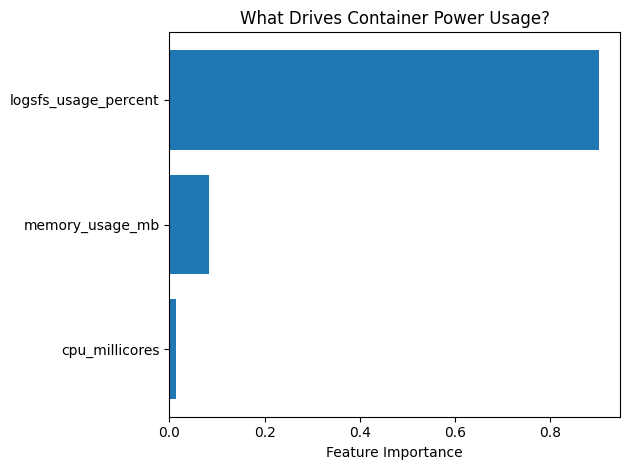

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What Drives Container Power Usage?")
plt.tight_layout()
plt.show()

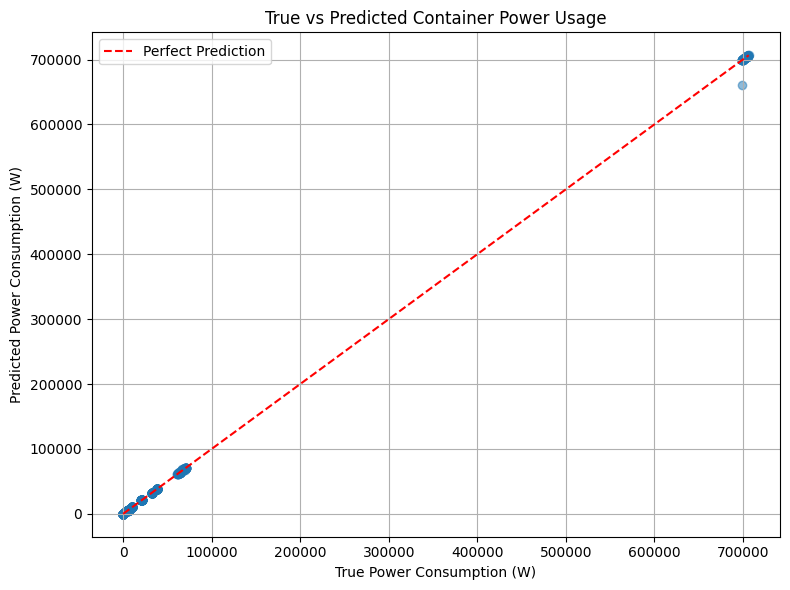

In [9]:
# Scatter plot of true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Reference line (perfect prediction)
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')

# Labels and title
plt.xlabel("True Power Consumption (W)")
plt.ylabel("Predicted Power Consumption (W)")
plt.title("True vs Predicted Container Power Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
